# Project

1. 관심 데이터 선정
 - AIHUB에서 한글 -> 영어 말뭉치 번역 데이터 선택
 

2. 데이터 선정이유
 - 파파고와 같은 번역 프로그램을 만들때, 트랜스포머와 RNN 둘 중 어느 모델이 더 적합할지 궁금했다.
 - 자료 출처 : https://aihub.or.kr/

3. 데이터를 이용한 가설 수립
 - 비슷한 조건에서 두 모델을 가동했을때, 트랜스포머 모델이 좀 더 나은 번역을 해낼 것 이다.

4. 데이터 전처리
 - 데이터 양이 많을 경우 학습시간도 오래 걸릴뿐 아니라 메모리 부족으로 토큰화나 모델가동에 에러가 발생하였음.
 - 1,210,529 데이터를 10,000 개의 데이터만 사용하는 것으로 축약함.

5. 딥러닝 방식 적용
 - transformer
 - RNN

6. 모델 검증(Validation)

데이터 구성
- sn - 데이터 번호
- file_name - 정제된 원본 문서명
- data_set - 기술과학/사회과학 구분
- domain - 데이터 대분야
- subdomain - 데이터 소분야
- source - 원문 출처
- ko - 한국어 문장
- mt - 기계번역 문장
- en - 영어 문장
- source_language - 원문 언어 코드
- target_language - 번역문 언어 코드
- license - 라이선스
- style - 문체

# 데이터셋 준비

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [9]:
train_csv = '1113_social_train_set_1210529.csv'
val_csv = '1113_social_valid_set_151316.csv'

train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)

print(train_df.shape, val_df.shape)

(1210529, 13) (151316, 13)


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210529 entries, 0 to 1210528
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   sn               1210529 non-null  object
 1   file_name        1210529 non-null  object
 2   data_set         1210529 non-null  object
 3   domain           1210529 non-null  object
 4   subdomain        1210529 non-null  object
 5   source           1210529 non-null  object
 6   ko               1210529 non-null  object
 7   mt               1210529 non-null  object
 8   en               1210529 non-null  object
 9   source_language  1210529 non-null  object
 10  target_language  1210529 non-null  object
 11  license          1210529 non-null  object
 12  style            1210529 non-null  object
dtypes: object(13)
memory usage: 120.1+ MB


In [11]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151316 entries, 0 to 151315
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sn               151316 non-null  object
 1   file_name        151316 non-null  object
 2   data_set         151316 non-null  object
 3   domain           151316 non-null  object
 4   subdomain        151316 non-null  object
 5   source           151316 non-null  object
 6   ko               151316 non-null  object
 7   mt               151316 non-null  object
 8   en               151316 non-null  object
 9   source_language  151316 non-null  object
 10  target_language  151316 non-null  object
 11  license          151316 non-null  object
 12  style            151316 non-null  object
dtypes: object(13)
memory usage: 15.0+ MB


In [12]:
# 데이터 정리
train_df = train_df[:10000]
val_df = val_df[:4000]

train_df = train_df[["ko","en"]]
val_df = val_df[["ko","en"]]

데이터양이 많아 모델링시 메모리 부족으로 부득이하게 축소하여 진행

In [8]:
print(train_df.shape)
train_df.head()

(10000, 2)


,ko,en
0,제2항을 함께 두는 것이 적절한지에 대하여 논의 과정에서 의문이 제기되기도 하였다.,"In the course of the discussion, questions wer..."
1,문제는 거래가 끊어진 경우에는 실제 거래가 이뤄지지 않기 때문에 이러한 실거래가 자...,"If the transaction is cut off, the actual tran..."
2,이러한 공공 부문 이동기기 개인 영상정보 규율의 문제점을 개선하기 위해 보호 체계 ...,This discussed ways to improve the protection ...
3,그 내용은 부품 사업자가 쉽게 알 수 없고 관여할 수 없기 때문에 중간 부품 생산자...,Since the contents are not easily known and in...
4,매칭정보를 획득하게 되면 통상 ‘ARP spoofing’이라는 해킹기법을 사용한다.,"When matching information is obtained, a hacki..."


In [9]:
print(val_df.shape)
val_df.head()

(4000, 2)


,ko,en
0,"국경 없는 인터넷의 특 성을 감안하여, 저작권법의 속지적인 특성에도 불구하고 미국 ...",Considering the type regarding the Internet wi...
1,학습자들이 제시한 건의사항을 해결하기 위해 다음과 같은 논의가 필요하다.,The following discussion is needed to resolve ...
2,2011년에 발생한 저축은행 부실사태 이후 관련 연구가 종종 이뤄지고 있다.,Some studies on the period after the savings b...
3,기업의 성장 측정 방식을 선택함에 있어 기업 규모에 따른 편향적인 결과가 도출되는 ...,In selecting a company's growth measurement me...
4,"1인 여행객 중 여성은 52.3%, 남성은 47.7%로 여성이 상대적으로 나 홀로 ...","Among solo travelers, 52.3% were female and 47..."


### transformer

개념 이해를 돕기위한 트랜스포머 이론 예시
(참고 사이트 : https://wikidocs.net/31379)

In [13]:
import pandas as pd
import urllib.request
import tensorflow_datasets as tfds
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt
import re

In [14]:
train_df.head()

,ko,en
0,제2항을 함께 두는 것이 적절한지에 대하여 논의 과정에서 의문이 제기되기도 하였다.,"In the course of the discussion, questions wer..."
1,문제는 거래가 끊어진 경우에는 실제 거래가 이뤄지지 않기 때문에 이러한 실거래가 자...,"If the transaction is cut off, the actual tran..."
2,이러한 공공 부문 이동기기 개인 영상정보 규율의 문제점을 개선하기 위해 보호 체계 ...,This discussed ways to improve the protection ...
3,그 내용은 부품 사업자가 쉽게 알 수 없고 관여할 수 없기 때문에 중간 부품 생산자...,Since the contents are not easily known and in...
4,매칭정보를 획득하게 되면 통상 ‘ARP spoofing’이라는 해킹기법을 사용한다.,"When matching information is obtained, a hacki..."


In [16]:
val_df.head()

,ko,en
0,"국경 없는 인터넷의 특 성을 감안하여, 저작권법의 속지적인 특성에도 불구하고 미국 ...",Considering the type regarding the Internet wi...
1,학습자들이 제시한 건의사항을 해결하기 위해 다음과 같은 논의가 필요하다.,The following discussion is needed to resolve ...
2,2011년에 발생한 저축은행 부실사태 이후 관련 연구가 종종 이뤄지고 있다.,Some studies on the period after the savings b...
3,기업의 성장 측정 방식을 선택함에 있어 기업 규모에 따른 편향적인 결과가 도출되는 ...,In selecting a company's growth measurement me...
4,"1인 여행객 중 여성은 52.3%, 남성은 47.7%로 여성이 상대적으로 나 홀로 ...","Among solo travelers, 52.3% were female and 47..."


토큰화를 위해 형태소 분석기를 사용하지 않고, 다른 방법인 학습 기반의 토크나이저를 사용하였습니다.\
원 데이터에서 ?, ., !와 같은 구두점을 미리 처리해두어야 하는데, 구두점들을 단순히 제거할 수도 있겠지만, 여기서는 구두점 앞에 공백. 즉, 띄어쓰기를 추가하여 다른 문자들과 구분하겠습니다.

In [28]:
questions = []
for sentence in train_df['ko']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)

In [29]:
answers = []
for sentence in train_df['en']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [30]:
questions2 = []
for sentence in val_df['ko']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions2.append(sentence)

In [31]:
answers2 = []
for sentence in val_df['en']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers2.append(sentence)

질문과 대답에 대해서 상위 5개만 출력하여 구두점들이 띄어쓰기를 통해 분리되었는지 확인해봅시다.

In [32]:
print(questions[:5])
print(answers[:5])

['제2항을 함께 두는 것이 적절한지에 대하여 논의 과정에서 의문이 제기되기도 하였다 .', '문제는 거래가 끊어진 경우에는 실제 거래가 이뤄지지 않기 때문에 이러한 실거래가 자료조차 찾을 수 없다는 점이다 .', '이러한 공공 부문 이동기기 개인 영상정보 규율의 문제점을 개선하기 위해 보호 체계 및 법제 개선방안을 논의하였다 .', '그 내용은 부품 사업자가 쉽게 알 수 없고 관여할 수 없기 때문에 중간 부품 생산자의 판매 행위는 대단히 불안한 지위에 놓이게 된다 .', '매칭정보를 획득하게 되면 통상 ‘ARP spoofing’이라는 해킹기법을 사용한다 .']
['In the course of the discussion ,  questions were raised as to whether it was appropriate to put Paragraph 2 together .', 'If the transaction is cut off ,  the actual transaction price cannot even be found because the actual transaction will not take place .', 'This discussed ways to improve the protection system and legal system in order to improve such a problem of the regulation of personal image information on mobile devices in the public sector .', "Since the contents are not easily known and involved by the parts business operator ,  intermediate parts manufacturers' sales behavior is placed in a precarious position .", "When matching information is obtained ,  a ha

### 단어 집합 생성

In [33]:
# 서브워드텍스트인코더를 사용하여 질문과 답변을 모두 포함한 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [34]:
# 서브워드텍스트인코더를 사용하여 질문과 답변을 모두 포함한 단어 집합(Vocabulary) 생성
tokenizer2 = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions2 + answers2, target_vocab_size=2**13)

# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN2, END_TOKEN2 = [tokenizer2.vocab_size], [tokenizer2.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE2 = tokenizer2.vocab_size + 2

In [35]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

시작 토큰 번호 : [8094]
종료 토큰 번호 : [8095]
단어 집합의 크기 : 8096


### 정수 인코딩과 패딩

In [36]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print('Tokenized sample question: {}'.format(tokenizer.encode(questions[20])))

Tokenized sample question: [2372, 3, 151, 5708, 2358, 258, 125, 221, 28, 829, 1345, 2284, 17, 216, 24, 125, 221, 675, 7380, 112, 1]


In [37]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 decode() 테스트해보기

# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [2372, 3, 151, 5708, 2358, 258, 125, 221, 28, 829, 1345, 2284, 17, 216, 24, 125, 221, 675, 7380, 112, 1]
기존 문장: 반면 ,  실적이 예상보다 부진한 기업의 주요 원인은 내수 부진이라고 응답하였다 .


In [38]:
# 각 정수는 각 단어와 어떻게 mapping되는지 병렬로 출력
# 서브워드텍스트인코더는 의미있는 단위의 서브워드로 토크나이징한다. 띄어쓰기 단위 X 형태소 분석 단위 X
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

2372 ----> 반면
3 ---->  ,  
151 ----> 실
5708 ----> 적이 
2358 ----> 예상
258 ----> 보다 
125 ----> 부
221 ----> 진
28 ----> 한 
829 ----> 기업의 
1345 ----> 주요 
2284 ----> 원인
17 ----> 은 
216 ----> 내
24 ----> 수 
125 ----> 부
221 ----> 진
675 ----> 이라고 
7380 ----> 응답
112 ----> 하였다
1 ---->  .


In [39]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)
  
  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs

In [40]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter2(inputs, outputs):
  tokenized_inputs2, tokenized_outputs2 = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN2 + tokenizer2.encode(sentence1) + END_TOKEN2
    sentence2 = START_TOKEN2 + tokenizer2.encode(sentence2) + END_TOKEN2

    tokenized_inputs2.append(sentence1)
    tokenized_outputs2.append(sentence2)
  
  # 패딩
  tokenized_inputs2 = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs2, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs2 = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs2, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs2, tokenized_outputs2

In [41]:
questions, answers = tokenize_and_filter(questions, answers)

In [42]:
questions2, answers2 = tokenize_and_filter2(questions2, answers2)

In [43]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

질문 데이터의 크기(shape) : (10000, 40)
답변 데이터의 크기(shape) : (10000, 40)


In [44]:
# 0번째 샘플을 임의로 출력
print(questions[0])
print(answers[0])

[8094 6904   12  665  580   15  174  153  591  240 4242  868  686 7870
  989 4258   14 1375 3960   50  112    1 8095    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8094   33    2 6327    4    2 5949    3 2553   69 4335   21    6  366
   27   34 1430    6 4528 7809 7870  514 7071    1 8095    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


### 인코더와 디코더의 입력, 그리고 레이블 만들기.

In [45]:
print('단어 집합의 크기(Vocab size): {}'.format(VOCAB_SIZE))
print('전체 샘플의 수(Number of samples): {}'.format(len(questions)))

단어 집합의 크기(Vocab size): 8096
전체 샘플의 수(Number of samples): 10000


In [46]:
# 텐서플로우 dataset을 이용하여 셔플(shuffle)을 수행하되, 배치 크기로 데이터를 묶는다.
# 또한 이 과정에서 교사 강요(teacher forcing)을 사용하기 위해서 디코더의 입력과 실제값 시퀀스를 구성한다.
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [47]:
# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset_val = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions2,
        'dec_inputs': answers2[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers2[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset_val = dataset_val.cache()
dataset_val = dataset_val.shuffle(BUFFER_SIZE)
dataset_val = dataset_val.batch(BATCH_SIZE)
dataset_val = dataset_val.prefetch(tf.data.experimental.AUTOTUNE)

In [48]:
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다.

[8094   33    2 6327    4    2 5949    3 2553   69 4335   21    6  366
   27   34 1430    6 4528 7809 7870  514 7071    1 8095    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[[8094   33    2 6327    4    2 5949    3 2553   69 4335   21    6  366
    27   34 1430    6 4528 7809 7870  514 7071    1 8095    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]
[[  33    2 6327    4    2 5949    3 2553   69 4335   21    6  366   27
    34 1430    6 4528 7809 7870  514 7071    1 8095    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


### 트랜스포머 만들기

In [49]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

(1, 8096, 256)
(1, 8096, 256)


In [50]:
# 학습률과 옵티마이저를 정의하고 모델을 컴파일합니다.

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

모델을 학습합니다.

Epoch 1/30
157/157 [==============================] - 117s 717ms/step - loss: 6.8172 - accuracy: 0.0276 - val_loss: 6.6990 - val_accuracy: 0.0426
Epoch 2/30
157/157 [==============================] - 112s 713ms/step - loss: 5.8642 - accuracy: 0.0624 - val_loss: 6.4551 - val_accuracy: 0.0531
Epoch 3/30
157/157 [==============================] - 114s 727ms/step - loss: 5.1437 - accuracy: 0.1091 - val_loss: 6.7420 - val_accuracy: 0.0633
Epoch 4/30
157/157 [==============================] - 112s 711ms/step - loss: 4.6983 - accuracy: 0.1602 - val_loss: 7.3394 - val_accuracy: 0.0519
Epoch 5/30
157/157 [==============================] - 112s 716ms/step - loss: 4.3159 - accuracy: 0.1842 - val_loss: 7.8869 - val_accuracy: 0.0525
Epoch 6/30
157/157 [==============================] - 114s 724ms/step - loss: 4.0707 - accuracy: 0.1997 - val_loss: 8.1355 - val_accuracy: 0.0501
Epoch 7/30
157/157 [==============================] - 133s 847ms/step - loss: 3.8697 - accuracy: 0.2163 - val_loss: 8.8266 -

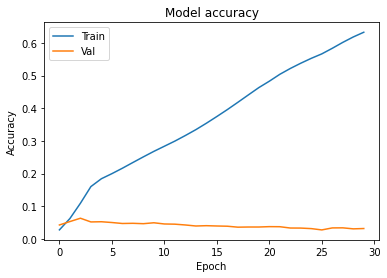

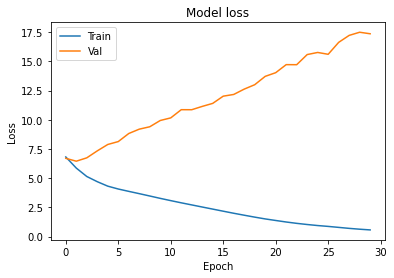

In [51]:
EPOCHS = 30

# 모델 훈련
results = model.fit(dataset, epochs=EPOCHS, validation_data=dataset_val)
print(results.history)

# 훈련 과정 시각화 (정확도)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 훈련 과정 시각화 (손실)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [52]:
model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 256)    3126784     ['inputs[0][0]',                 
                                                                  'enc_padding_mask[0][0

# 챗봇 평가하기

In [53]:
def evaluate(sentence):
  sentence = preprocess_sentence(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재(마지막) 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 마지막 시점의 예측 단어를 출력에 연결한다.
    # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)


def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence

In [54]:
def preprocess_sentence(sentence):
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

In [55]:
output = predict('그 내용은 부품 사업자가 쉽게 알 수 없고 관여할 수 없기 때문에 중간 부품 생산자의 판매 행위는 대단히 불안한 지위에 놓이게 된다.')

'''
답 문장: ince the contents are not easily known and involved by the parts business operator, intermediate parts manufacturers' sales behavior is placed in a precarious position.
'''

Input: 그 내용은 부품 사업자가 쉽게 알 수 없고 관여할 수 없기 때문에 중간 부품 생산자의 판매 행위는 대단히 불안한 지위에 놓이게 된다.
Output: The contents are placed on the contents of the partnership ,  not the seller is placed in a cargo regarding the particle and high level of a carbond .


"\n답 문장: ince the contents are not easily known and involved by the parts business operator, intermediate parts manufacturers' sales behavior is placed in a precarious position.\n"

In [56]:
output = predict("AAA는 '취미' 개념을 인간의 마음이 '사고권'과 분리되지 않은 상태를 설명하기 위해 도입함으로써 그리스의 교육 이념으로 명명되었던 칼로카가티아의 의미를 현대적으로 재해석하고 있다는 느낌을 준다.")

'''
정답 문장: y introducing the concept of “hobby” to explain the state in which the human mind is not separated from the 
“right to think,” AAA gives the impression that it is reinterpreting the meaning of Kalos kagathos, 
which was named as the Greek educational ideology, in a modern way.
'''

Input: AAA는 '취미' 개념을 인간의 마음이 '사고권'과 분리되지 않은 상태를 설명하기 위해 도입함으로써 그리스의 교육 이념으로 명명되었던 칼로카가티아의 의미를 현대적으로 재해석하고 있다는 느낌을 준다.
Output: AAA stated that sensory factors in the reputation of human rights in humanitime human eggs ,  mind ,  and impulse itself did not describe it by AAA .


'\n정답 문장: y introducing the concept of “hobby” to explain the state in which the human mind is not separated from the \n“right to think,” AAA gives the impression that it is reinterpreting the meaning of Kalos kagathos, \nwhich was named as the Greek educational ideology, in a modern way.\n'

In [57]:
output = predict("우리는 이제 쌍곡기하학에서 삼각형의 각도의 합계가 π가 되는지 안되는지 볼 수 있는 위치에 있다.")

'''
정답 문장: we are now in a position to see whether the angles of a triangle in hyperbolic geometry add up to π or not.
'''

Input: 우리는 이제 쌍곡기하학에서 삼각형의 각도의 합계가 π가 되는지 안되는지 볼 수 있는 위치에 있다.
Output: We are now in a position to see whether the angles of a triangle in hyperbolic geometry add as a triangle .


'\n정답 문장: we are now in a position to see whether the angles of a triangle in hyperbolic geometry add up to π or not.\n'

In [58]:
output = predict("프로젝트 성공할까 ? ")

'''
정답 문장: Will the project succeed?
'''

Input: 프로젝트 성공할까 ? 
Output: successful used ,  the pirate of the pile class method .


'\n정답 문장: Will the project succeed?\n'

In [59]:
output = predict("이 문장도 성공할까? ")

'''
정답 문장: Will this sentence also work?
'''

Input: 이 문장도 성공할까? 
Output: Can this physis us sure successful ?


'\n정답 문장: Will this sentence also work?\n'

형태소 분석을 활용하지 못해서 번역에서 약간 부족한 모습을 보여주었지만, 추후 형태소분석 부분을 추가하면 괜찮은 결과를 나타내줄것으로 예상됨.